In [1]:
import pandas as pd
from data_preprocessing import get_cleaned_data, get_cleaned_data_final, convert_numberical_to_categorical
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [2]:
raw_data = get_cleaned_data_final()

# select only the columns with target = 0
# target_value = 0
# data = data[data["TARGET"] == target_value]

In [3]:
data = raw_data

data = convert_numberical_to_categorical(data)

remove_cols = [
    		'OBS_60_CNT_SOCIAL_CIRCLE', 
            'DEF_60_CNT_SOCIAL_CIRCLE',
			'FLAG_WORK_PHONE', 
			'FLAG_EMP_PHONE',
			'FLAG_CONT_MOBILE',
			'FLAG_PHONE',
			'REG_CITY_NOT_LIVE_CITY',
			'LIVE_REGION_NOT_WORK_REGION',
			'FLAG_EMAIL',
			'LIVE_CITY_NOT_WORK_CITY'
			]

data = data.drop(columns=remove_cols)

categorial_columns = data.select_dtypes(include=['object', 'category']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

assert len(categorial_columns) + len(numerical_columns) == len(data.columns)

print("Categorial columns: ", categorial_columns)
print("Numerical columns: ", numerical_columns)


Categorial columns:  Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')
Numerical columns:  Index([], dtype='object')


In [4]:
def create_dataset(data, num=None):
    dataset = []
    if num is None:
        num = len(data)
    for i in range(0, num):
        dataset.append(list(map(str, data.iloc[i].values.tolist())))
    print("Dataset created")
    return dataset
dataset = create_dataset(data, None)
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
print("TE created")
print("TE array shape: ", te_ary.shape)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
print("Freq itemsets created")
frequent_itemsets.to_csv(f"../data/all_frequent_itemset.csv")

Dataset created
TE created
TE array shape:  (302751, 146)
Freq itemsets created


In [5]:
# frequent_itemsets = pd.read_csv(f"../data/TARGET_1_frequent_itemsets_1.csv")
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("Rules created")

Rules created


In [6]:
rules.to_csv(f"../data/all_association_rules.csv")

In [7]:
show_num = 20

In [8]:
sorted_by_support = frequent_itemsets.sort_values(by="support", ascending=False)
print(sorted_by_support.head(show_num).to_string())

      support                                                                                            itemsets
13   0.928681                                                                      (HOUR_APPR_PROCESS_START_6_18)
22   0.918643                                                                                          (TARGET_0)
14   0.904853                                                                     (NAME_CONTRACT_TYPE_Cash loans)
17   0.886940                                                               (NAME_HOUSING_TYPE_House / apartment)
107  0.853011                                                            (TARGET_0, HOUR_APPR_PROCESS_START_6_18)
100  0.840516                                       (NAME_CONTRACT_TYPE_Cash loans, HOUR_APPR_PROCESS_START_6_18)
114  0.828757                                                           (NAME_CONTRACT_TYPE_Cash loans, TARGET_0)
103  0.826418                                 (NAME_HOUSING_TYPE_House / apartment, HOUR

In [9]:
sorted_by_confidence = rules.sort_values(by="confidence", ascending=False)
print(sorted_by_confidence.head(show_num).to_string(index=False))

                                                                                      antecedents                    consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
          (NAME_HOUSING_TYPE_House / apartment, NAME_CONTRACT_TYPE_Cash loans, FLAG_OWN_REALTY_Y) (HOUR_APPR_PROCESS_START_6_18)            0.579463            0.928681 0.547014    0.944001 1.016497  0.008878    1.273592       0.038593
(NAME_HOUSING_TYPE_House / apartment, NAME_CONTRACT_TYPE_Cash loans, TARGET_0, FLAG_OWN_REALTY_Y) (HOUR_APPR_PROCESS_START_6_18)            0.532091            0.928681 0.502268    0.943951 1.016443  0.008125    1.272445       0.034573
                                       (REGION_RATING_CLIENT_W_CITY_2, AMT_INCOME_TOTAL_0_200000) (HOUR_APPR_PROCESS_START_6_18)            0.560692            0.928681 0.528603    0.942769 1.015170  0.007899    1.246161       0.034016
                                               (NAME_CON

In [10]:
sorted_by_lift = rules.sort_values(by="lift", ascending=False)
print(sorted_by_lift.head(show_num).to_string(index=False))

                                                                      antecedents                                                                       consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
                                                            (AMT_CREDIT_0_600000)                                                             (AMT_ANNUITY_0_30000)            0.602624            0.653349 0.532870    0.884250 1.353412  0.139147    2.994828       0.657127
                                                            (AMT_ANNUITY_0_30000)                                                             (AMT_CREDIT_0_600000)            0.653349            0.602624 0.532870    0.815598 1.353412  0.139147    2.154949       0.753284
                                                                 (FLAG_OWN_CAR_N)                                                                   (CODE_GENDER_F)            0.662026    

In [11]:
sorted_by_leverage = rules.sort_values(by="leverage", ascending=False)
print(sorted_by_leverage.head(show_num).to_string(index=False))

                                                                      antecedents                                                                       consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
                                                            (AMT_CREDIT_0_600000)                                                             (AMT_ANNUITY_0_30000)            0.602624            0.653349 0.532870    0.884250 1.353412  0.139147    2.994828       0.657127
                                                            (AMT_ANNUITY_0_30000)                                                             (AMT_CREDIT_0_600000)            0.653349            0.602624 0.532870    0.815598 1.353412  0.139147    2.154949       0.753284
                                                                 (FLAG_OWN_CAR_N)                                                                   (CODE_GENDER_F)            0.662026    

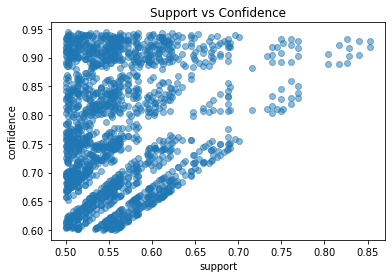

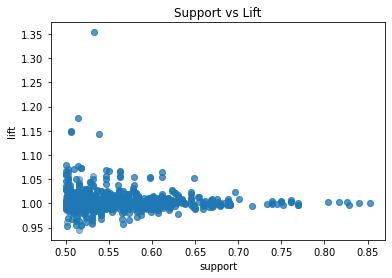

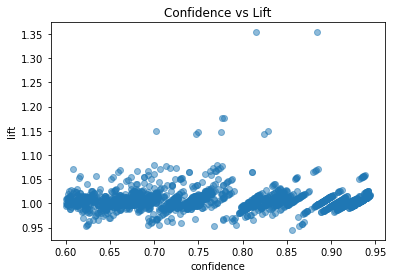

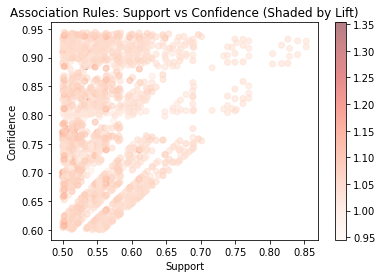

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot support vs. confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

# Plot support vs. lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

# Plot confidence vs. lift
plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs Lift')
plt.show()

# Plot support vs. confidence with shading as lift
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='Reds', alpha=0.5)
plt.colorbar()
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (Shaded by Lift)')
plt.show()